In [100]:
# import
from inference import *
from HMM_models import *
import matplotlib.pyplot as plt

In [101]:
# create models

pi0 = np.array([0.333, 0.333, 0.334]) #inital distribution
Ps = np.array([[0.33, 0.33, 0.34], [0.33, 0.33, 0.34], [0.33, 0.33, 0.34]]) #transition matrix

#toy example
counts = np.array([0, 1, 2, 3, 4, 4,4,4,4,4]).astype(np.int32)
lambdas = np.array([1, 1, 2]).astype(np.int32)
ll = poisson_logpdf(counts, lambdas)

# run toy example to initialize funciuton
posterior, normalizer = hmm_expected_states(pi0, Ps, ll)


In [102]:
ll.shape

(10, 3)

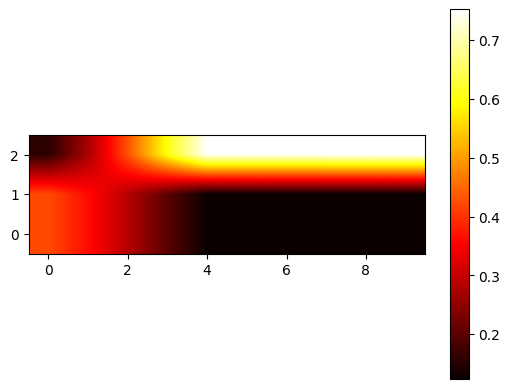

In [103]:
plt.imshow(posterior.T, cmap='hot', interpolation= 'bilinear', origin='lower')
plt.colorbar()

plt.show()

In [104]:
#common parameters
x0 = 0.2
Rh = 75
T = 100

# define parameters ramp
beta = 1.5
sigma = 0.3
K = 50

# define parameters step
m = 32
r = 20

In [105]:
# Replace numerical arguments with variable name
rhmm = HMM_Ramp_Model(beta, sigma, x0, Rh)
shmm = HMM_Step_Model(m, r, x0, Rh)

In [107]:
spikes_step, xs_step, rates_step = shmm.simulate()
spikes_ramp, xs_ramp, rates_ramp = rhmm.simulate()

TypeError: HMM_Step_Model.get_transition_matrix() takes 1 positional argument but 3 were given

In [ ]:
ll_ramp = poisson_logpdf(spikes_ramp, rhmm.lambdas)
ll_step = poisson_logpdf(spikes_step, shmm.lambdas)

In [ ]:

posterior_ramp, normalizer_ramp = hmm_expected_states(rhmm.pi0, rhmm.P, ll_ramp)
posterior_step, normalizer_step = hmm_expected_states(shmm.pi0, shmm.P, ll_step)

In [ ]:
plt.imshow(posterior_ramp.T, cmap='hot', interpolation='bilinear', origin='lower', vmin=0.0, vmax=0.3, aspect = 'auto')
plt.xlabel('Time index ($ \Delta t = 10 ms$)')
plt.ylabel('$s_t$')
plt.colorbar()
plt.show()

In [ ]:
ll_step.shape